<a href="https://colab.research.google.com/github/umiSirya/General-Data-analysis/blob/main/Copy_of_Global_Youtube_statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!pip install kaggle


In [ ]:
#getting kaggle dataset
!kaggle datasets download  -d nelgiriyewithana/global-youtube-statistics-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/global-youtube-statistics-2023
License(s): other
  0% 0.00/60.1k [00:00<?, ?B/s]
100% 60.1k/60.1k [00:00<00:00, 69.9MB/s]


In [ ]:
import zipfile
zipfile_path = '/content/global-youtube-statistics-2023.zip'
csv_file = zipfile_path.replace('zip', '')
with zipfile.ZipFile(zipfile_path, 'r') as file:
  file.extractall()
  print('Done')


Done


In [ ]:
youtube = pd.read_csv('/content/Global YouTube Statistics.csv', encoding='latin-1')

In [ ]:
#make copies of the dataset
youtube_copy = youtube.copy()

In [ ]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     995 non-null    int64  
 1   Youtuber                                 995 non-null    object 
 2   subscribers                              995 non-null    int64  
 3   video views                              995 non-null    float64
 4   category                                 949 non-null    object 
 5   Title                                    995 non-null    object 
 6   uploads                                  995 non-null    int64  
 7   Country                                  873 non-null    object 
 8   Abbreviation                             873 non-null    object 
 9   channel_type                             965 non-null    object 
 10  video_views_rank                         994 non-n

In [ ]:
#PERCENTAGE OF NULL VALUES
youtube.isnull().sum()/len(youtube)*100

,0
rank,0.000000
Youtuber,0.000000
subscribers,0.000000
video views,0.000000
category,4.623116
Title,0.000000
uploads,0.000000
Country,12.261307
Abbreviation,12.261307
channel_type,3.015075


In [ ]:
#drop rows in Country where the value is null
youtube.dropna(subset=['Country'], inplace=True)

In [ ]:
#check for null values in Country
youtube['Country'].isnull().sum()

0

In [ ]:
#dropping columns Abbbreviation, Population,video_views_for_the_last_30_days,subscribers_for_last_30_days
youtube.drop(['Abbreviation','video_views_for_the_last_30_days','subscribers_for_last_30_days'], axis=1, inplace=True)


In [ ]:
#drop the missing values in created_year,created_month,created_date
youtube.dropna(subset=['created_year', 'created_month', 'created_date'], inplace=True)

In [ ]:
#drop the row with missing values in Gross tertiary education enrollment (%), Unemployment rate ,Urban_population ,Latitude ,Longitude
youtube.dropna(subset=['Gross tertiary education enrollment (%)', 'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude'], inplace=True)

In [ ]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
Index: 869 entries, 0 to 994
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   rank                                     869 non-null    int64  
 1   Youtuber                                 869 non-null    object 
 2   subscribers                              869 non-null    int64  
 3   video views                              869 non-null    float64
 4   category                                 830 non-null    object 
 5   Title                                    869 non-null    object 
 6   uploads                                  869 non-null    int64  
 7   Country                                  869 non-null    object 
 8   channel_type                             863 non-null    object 
 9   video_views_rank                         869 non-null    float64
 10  country_rank                             869 non-null  

<Axes: >

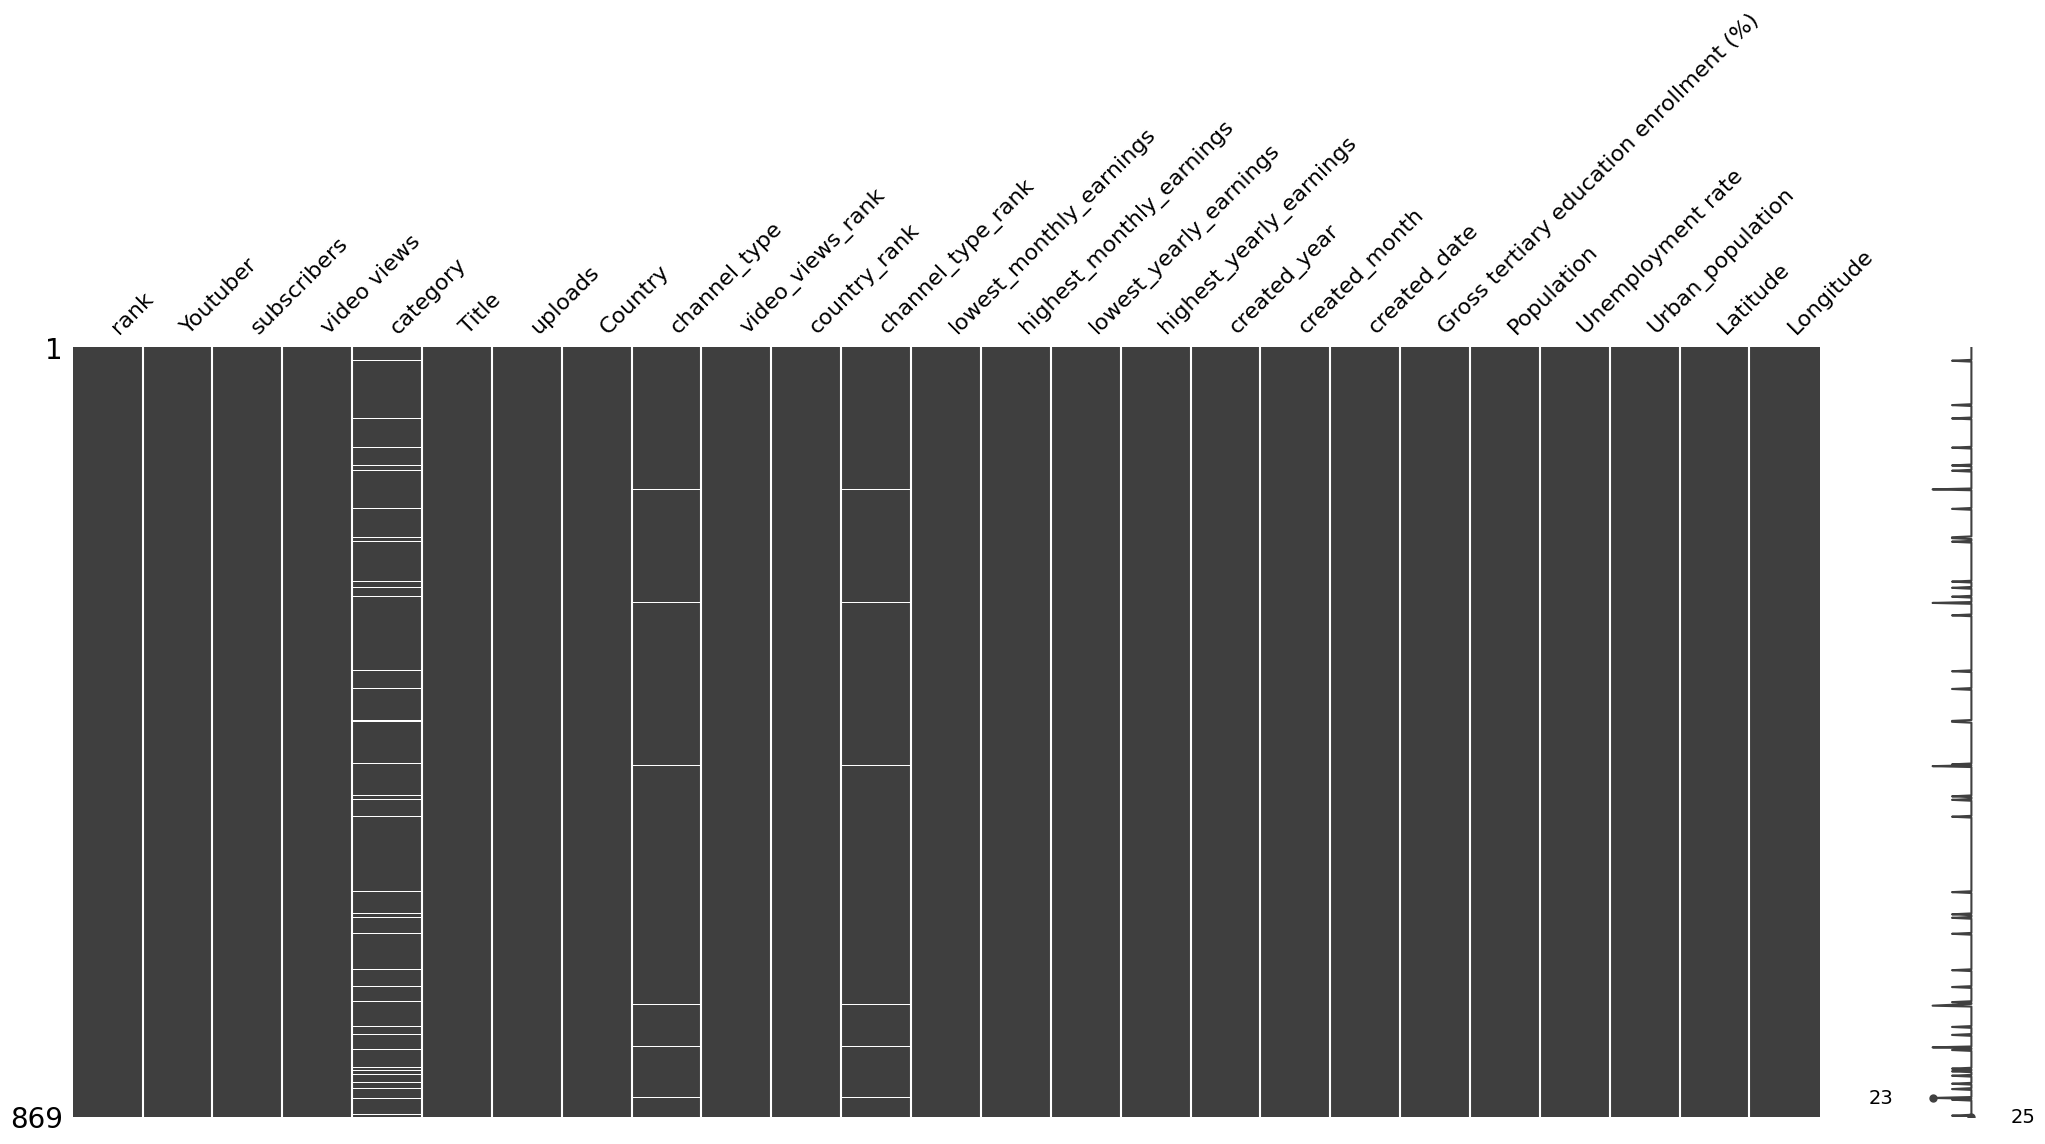

In [ ]:
#create a missigno matrix
import missingno as msno
msno.matrix(youtube)

In [ ]:
#Find the mode for channel_type
youtube['channel_type'].mode()
#Fill in the missing values with the mode
youtube['channel_type'].fillna('Entertainment', inplace=True)

<ipython-input-16-ab23605ee001>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['channel_type'].fillna('Entertainment', inplace=True)


In [ ]:
#FIND MODE FOR CATEGORY
youtube['category'].mode()
#Fill in the missing values with the mode
youtube['category'].fillna('Music', inplace=True)

<ipython-input-17-855caa62d36c>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['category'].fillna('Music', inplace=True)


In [ ]:
youtube.head(5)

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,...,highest_yearly_earnings,created_year,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,...,1.084000e+08,2006.0,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,Games,4055159.0,...,5.800000e-01,2006.0,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,Entertainment,48.0,...,6.470000e+07,2012.0,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.0,...,9.480000e+07,2006.0,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,Entertainment,3.0,...,8.750000e+07,2006.0,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880


In [ ]:
# Map months to numeric values
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
# Convert 'created_month' to month numbers
youtube['created_month_num'] = youtube['created_month'].map(month_map)
# Convert to datetime with proper year, month, and day columns
youtube['created_datetime'] = pd.to_datetime(
    youtube['created_year'].astype(int).astype(str) + '-' +
    youtube['created_month_num'].astype(str) + '-' +
    youtube['created_date'].astype(int).astype(str),
    errors='coerce'
)
# Display the dataframe to verify
print(youtube)

     rank                    Youtuber  subscribers   video views  \
0       1                    T-Series    245000000  2.280000e+11   
1       2              YouTube Movies    170000000  0.000000e+00   
2       3                     MrBeast    166000000  2.836884e+10   
3       4  Cocomelon - Nursery Rhymes    162000000  1.640000e+11   
4       5                   SET India    159000000  1.480000e+11   
..    ...                         ...          ...           ...   
990   991               Natan por Aï¿     12300000  9.029610e+09   
991   992    Free Fire India Official     12300000  1.674410e+09   
992   993                       Panda     12300000  2.214684e+09   
993   994                 RobTopGames     12300000  3.741235e+08   
994   995                Make Joke Of     12300000  2.129774e+09   

             category                       Title  uploads         Country  \
0               Music                    T-Series    20082           India   
1    Film & Animation      

In [ ]:
youtube

,rank,Youtuber,subscribers,video views,category,Title,uploads,Country,channel_type,video_views_rank,...,created_month,created_date,Gross tertiary education enrollment (%),Population,Unemployment rate,Urban_population,Latitude,Longitude,created_month_num,created_datetime
0,1,T-Series,245000000,2.280000e+11,Music,T-Series,20082,India,Music,1.0,...,Mar,13.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,3,2006-03-13
1,2,YouTube Movies,170000000,0.000000e+00,Film & Animation,youtubemovies,1,United States,Games,4055159.0,...,Mar,5.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,3,2006-03-05
2,3,MrBeast,166000000,2.836884e+10,Entertainment,MrBeast,741,United States,Entertainment,48.0,...,Feb,20.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,2,2012-02-20
3,4,Cocomelon - Nursery Rhymes,162000000,1.640000e+11,Education,Cocomelon - Nursery Rhymes,966,United States,Education,2.0,...,Sep,1.0,88.2,3.282395e+08,14.70,270663028.0,37.090240,-95.712891,9,2006-09-01
4,5,SET India,159000000,1.480000e+11,Shows,SET India,116536,India,Entertainment,3.0,...,Sep,20.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,9,2006-09-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,991,Natan por Aï¿,12300000,9.029610e+09,Sports,Natan por Aï¿,1200,Brazil,Entertainment,525.0,...,Feb,12.0,51.3,2.125594e+08,12.08,183241641.0,-14.235004,-51.925280,2,2017-02-12
991,992,Free Fire India Official,12300000,1.674410e+09,People & Blogs,Free Fire India Official,1500,India,Games,6141.0,...,Sep,14.0,28.1,1.366418e+09,5.36,471031528.0,20.593684,78.962880,9,2018-09-14
992,993,Panda,12300000,2.214684e+09,Music,HybridPanda,2452,United Kingdom,Games,129005.0,...,Sep,11.0,60.0,6.683440e+07,3.85,55908316.0,55.378051,-3.435973,9,2006-09-11
993,994,RobTopGames,12300000,3.741235e+08,Gaming,RobTopGames,39,Sweden,Games,35112.0,...,May,9.0,67.0,1.028545e+07,6.48,9021165.0,60.128161,18.643501,5,2012-05-09


In [ ]:
#median for the channel_type_rank
median_typerank=youtube['channel_type_rank'].median()
#fill in the null values with the median
youtube['channel_type_rank'].fillna(median_typerank, inplace=True)


<ipython-input-21-e69f36d4636b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  youtube['channel_type_rank'].fillna(median_typerank, inplace=True)


# **Visualization**

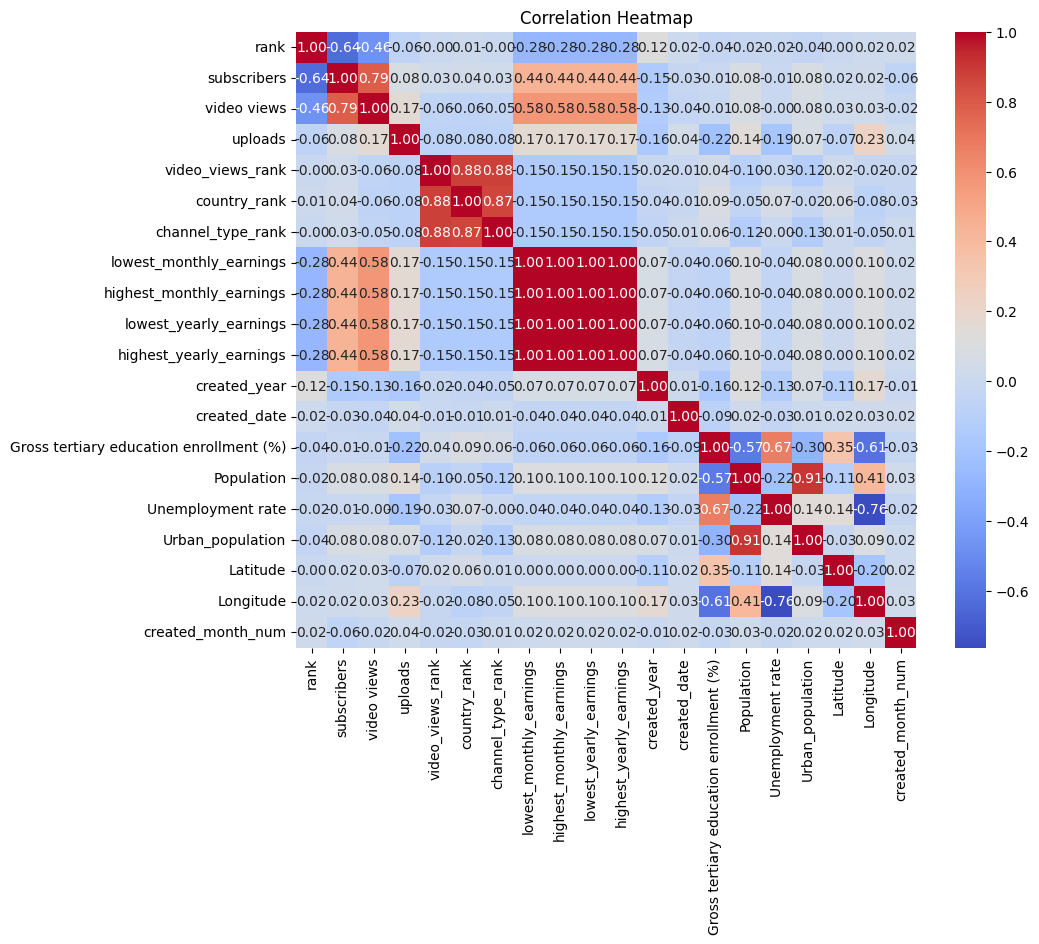

In [ ]:
#correlation heatmap for values with numerical data
numeric_columns = youtube.select_dtypes(include=[np.number])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


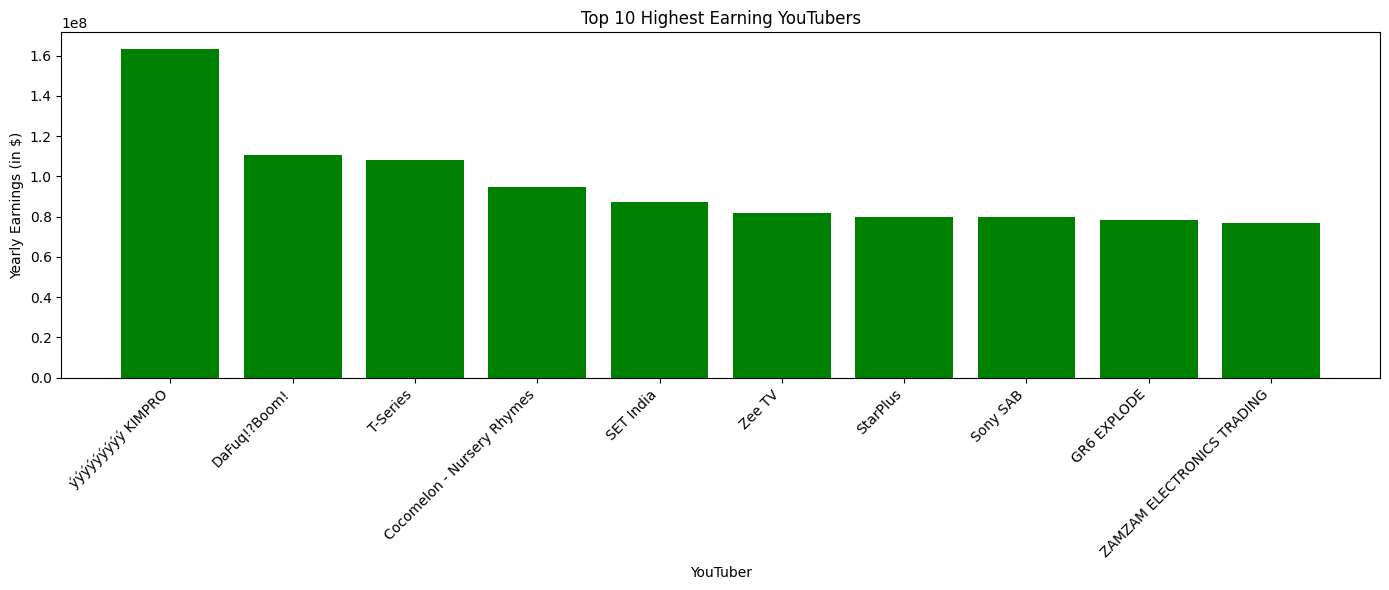

In [ ]:
top_earning = youtube.sort_values(by='highest_yearly_earnings', ascending=False).head(10)
plt.figure(figsize=(14, 6))
plt.bar(top_earning['Youtuber'], top_earning['highest_yearly_earnings'], color='green')
plt.title('Top 10 Highest Earning YouTubers')
plt.xlabel('YouTuber')
plt.ylabel('Yearly Earnings (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

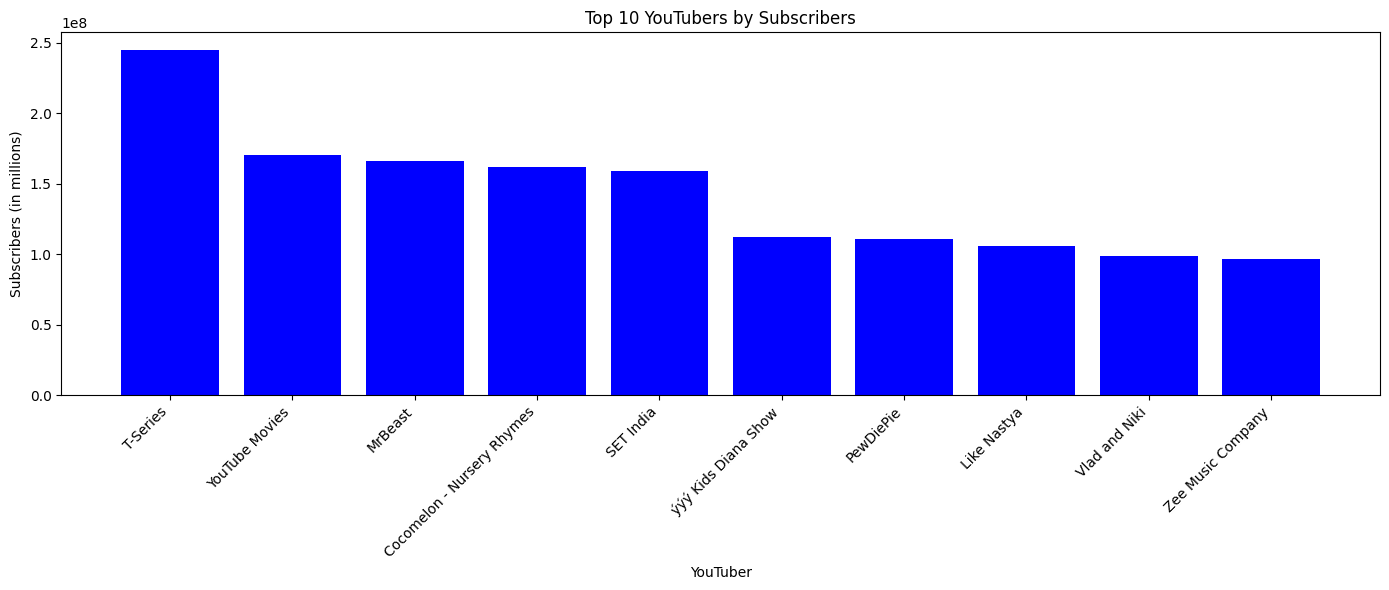

In [ ]:
# Sort data to get the highest and lowest subscriber counts
top_subscribers = youtube.sort_values(by='subscribers', ascending=False).head(10)
lowest_subscribers = youtube.sort_values(by='subscribers', ascending=True).head(10)

# Plot top 10 YouTubers by subscribers
plt.figure(figsize=(14, 6))
plt.bar(top_subscribers['Youtuber'], top_subscribers['subscribers'], color='blue')
plt.title('Top 10 YouTubers by Subscribers')
plt.xlabel('YouTuber')
plt.ylabel('Subscribers (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
earnings_by_country = youtube.groupby('Country')[['highest_yearly_earnings', 'lowest_yearly_earnings']].sum().reset_index()
subscribers_by_country = youtube.groupby('Country')['subscribers'].sum().reset_index()

In [ ]:
# Get the top 10 countries by highest and lowest earnings
top_earning_countries = earnings_by_country.sort_values(by='highest_yearly_earnings', ascending=False).head(10)
lowest_earning_countries = earnings_by_country.sort_values(by='lowest_yearly_earnings', ascending=True).head(15)


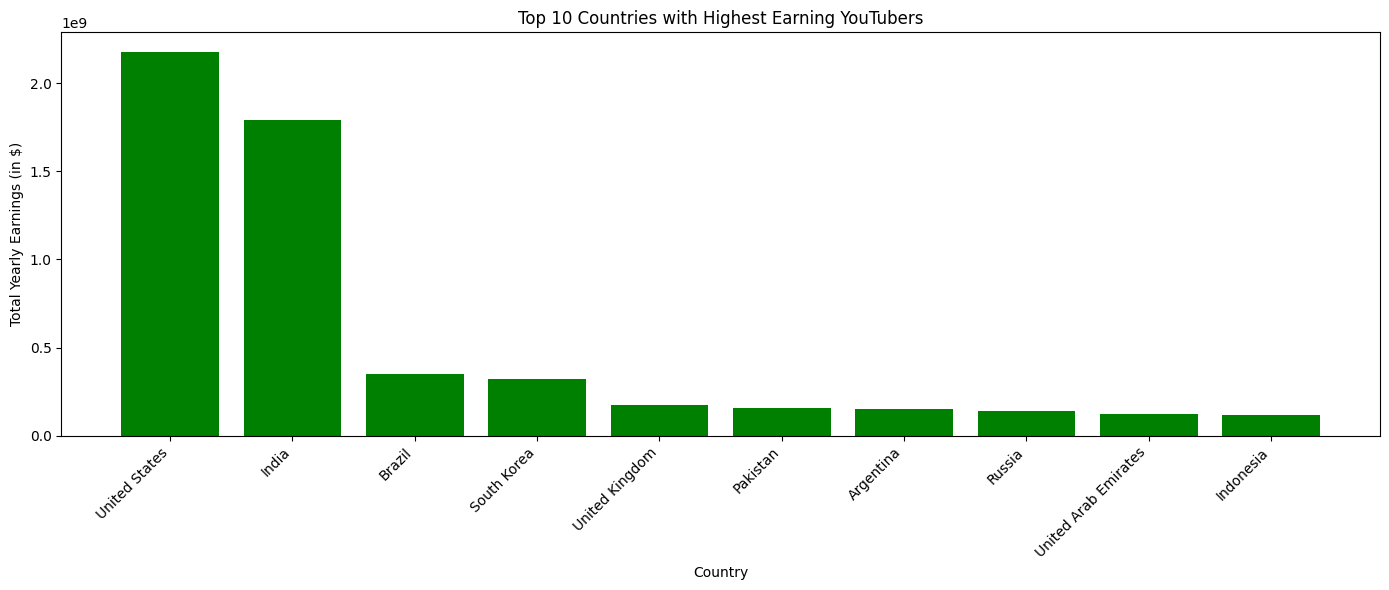

In [ ]:
# Plot top 10 highest earning countries
plt.figure(figsize=(14, 6))
plt.bar(top_earning_countries['Country'], top_earning_countries['highest_yearly_earnings'], color='green')
plt.title('Top 10 Countries with Highest Earning YouTubers')
plt.xlabel('Country')
plt.ylabel('Total Yearly Earnings (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

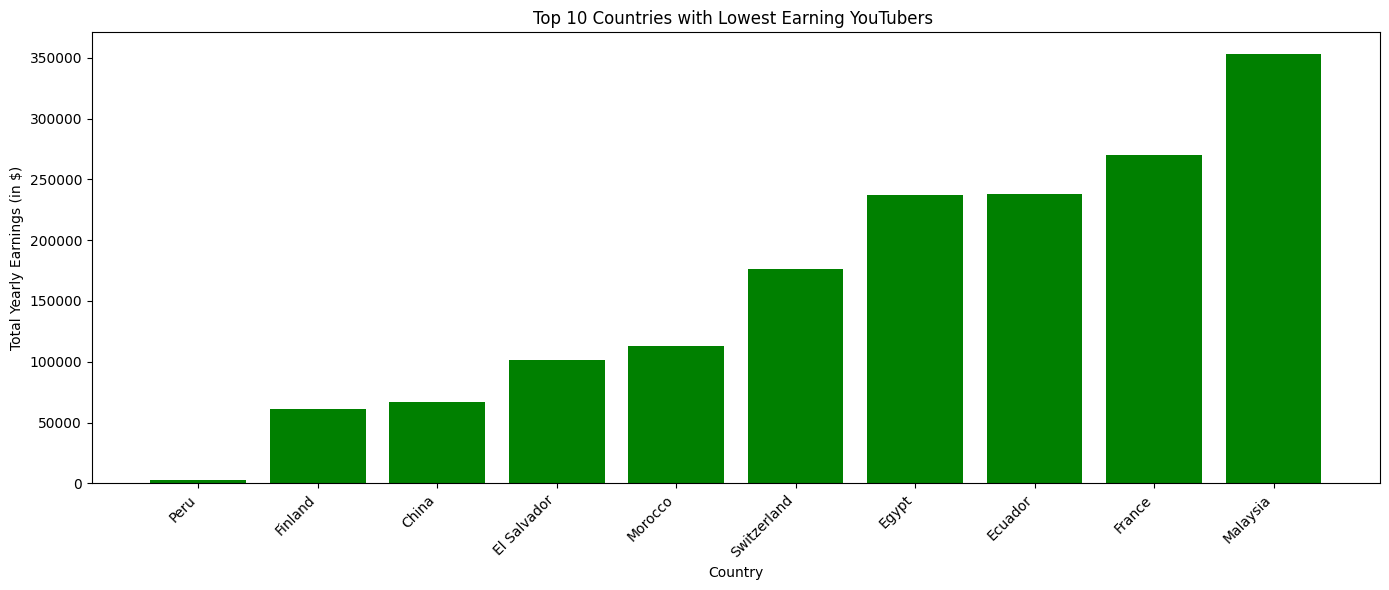

In [ ]:
# Plot top 10 lowest earning countries
# Get Peru's lowest_yearly_earnings
peru_earnings = lowest_earning_countries.loc[lowest_earning_countries['Country'] == 'Peru', 'lowest_yearly_earnings'].values[0]

# Filter countries with earnings greater than Peru
countries_greater_than_peru = lowest_earning_countries[lowest_earning_countries['lowest_yearly_earnings'] >= peru_earnings].head(10)

# Plot
plt.figure(figsize=(14, 6))
plt.bar(countries_greater_than_peru['Country'], countries_greater_than_peru['lowest_yearly_earnings'], color='green')
plt.title('Top 10 Countries with Lowest Earning YouTubers ')
plt.xlabel('Country')
plt.ylabel('Total Yearly Earnings (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()








In [ ]:
# Get the top 10 countries by highest and lowest subscribers
top_subscriber_countries = subscribers_by_country.sort_values(by='subscribers', ascending=False).head(10)
lowest_subscriber_countries = subscribers_by_country.sort_values(by='subscribers', ascending=True).head(10)


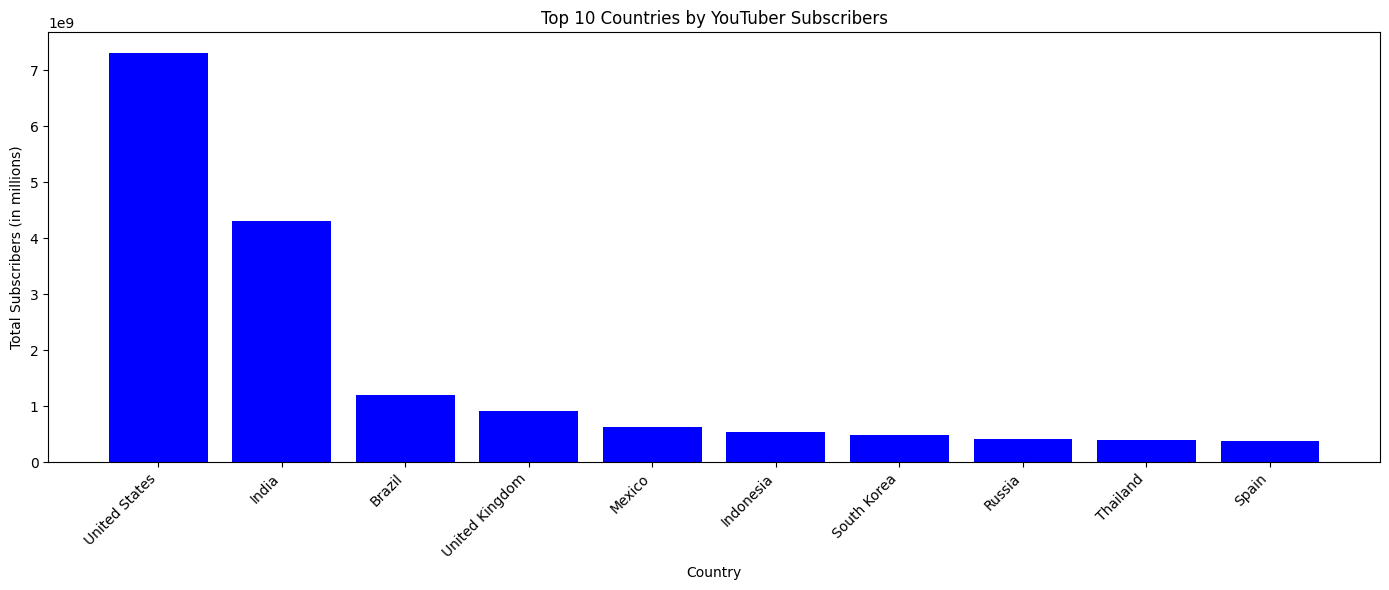

In [ ]:
# Plot top 10 countries by subscribers
plt.figure(figsize=(14, 6))
plt.bar(top_subscriber_countries['Country'], top_subscriber_countries['subscribers'], color='blue')
plt.title('Top 10 Countries by YouTuber Subscribers')
plt.xlabel('Country')
plt.ylabel('Total Subscribers (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


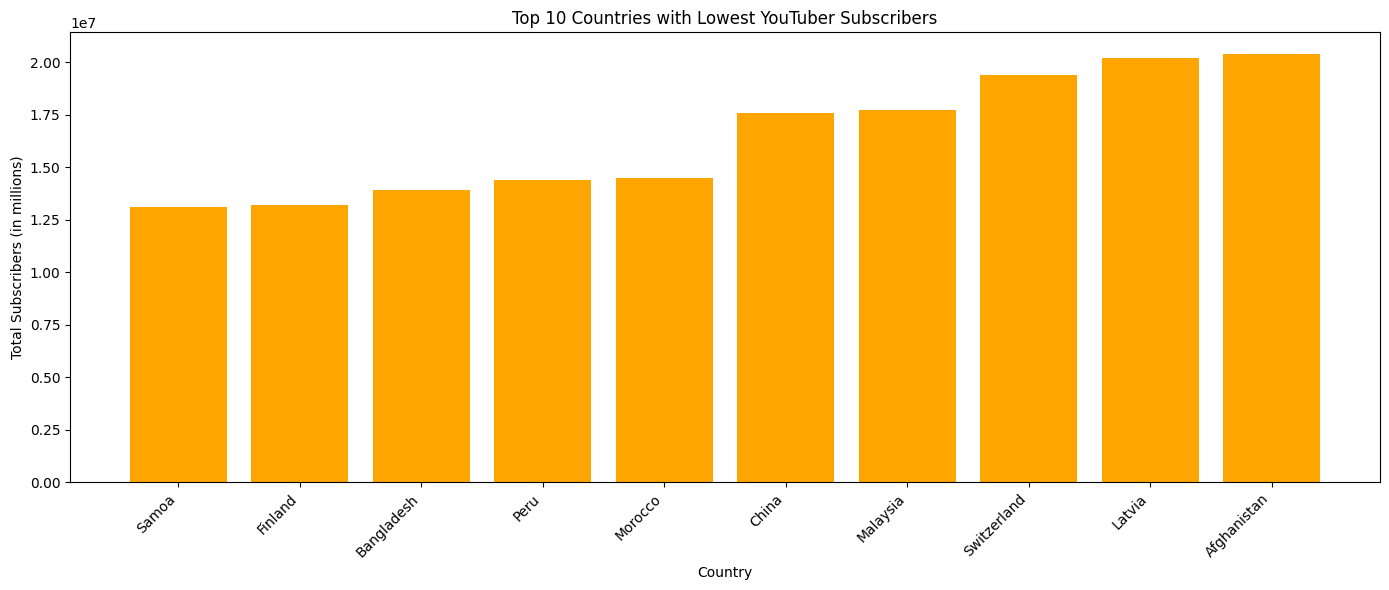

In [ ]:

# Plot 10 countries with the lowest subscribers
plt.figure(figsize=(14, 6))
plt.bar(lowest_subscriber_countries['Country'], lowest_subscriber_countries['subscribers'], color='orange')
plt.title('Top 10 Countries with Lowest YouTuber Subscribers')
plt.xlabel('Country')
plt.ylabel('Total Subscribers (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

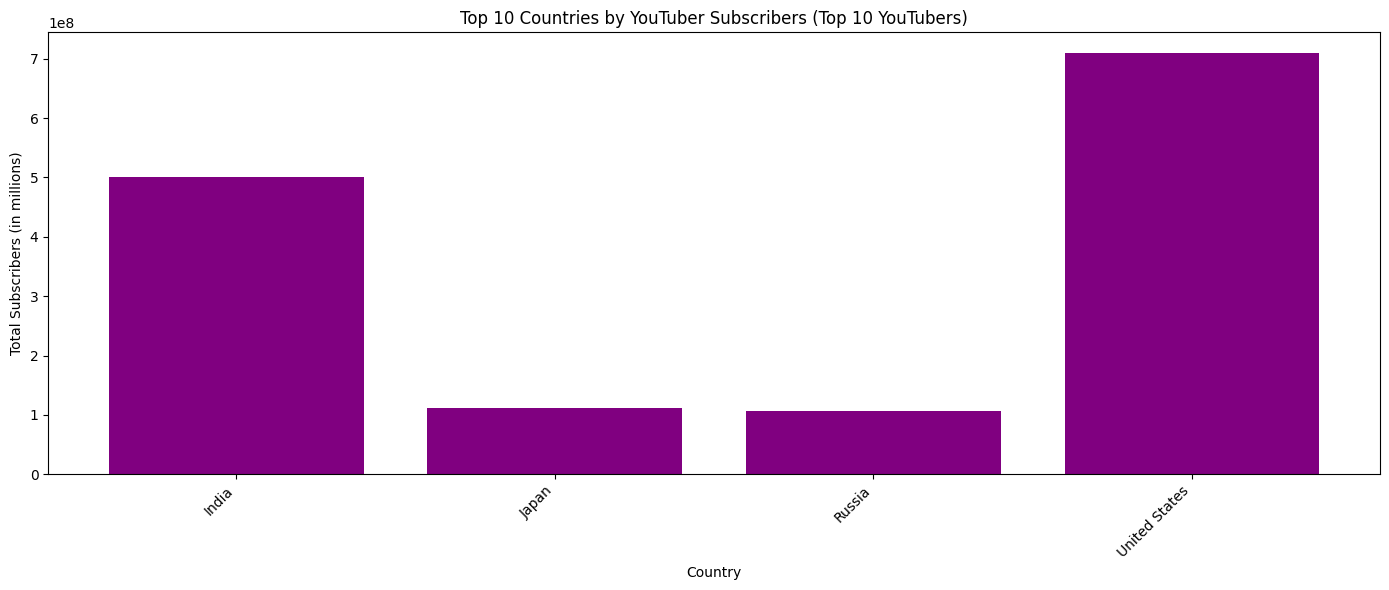

                      Youtuber        Country  subscribers
0                     T-Series          India    245000000
1               YouTube Movies  United States    170000000
2                      MrBeast  United States    166000000
3   Cocomelon - Nursery Rhymes  United States    162000000
4                    SET India          India    159000000
6          ýýý Kids Diana Show  United States    112000000
7                    PewDiePie          Japan    111000000
8                  Like Nastya         Russia    106000000
9                Vlad and Niki  United States     98900000
10           Zee Music Company          India     96700000


In [ ]:
top_10_subscribers = youtube.sort_values(by='subscribers', ascending=False).head(10)
top_subscribers_by_country = top_10_subscribers.groupby('Country')['subscribers'].sum().reset_index()
# Plot top 10 countries with the highest subscribers
plt.figure(figsize=(14, 6))
plt.bar(top_subscribers_by_country['Country'], top_subscribers_by_country['subscribers'], color='purple')
plt.title('Top 10 Countries by YouTuber Subscribers (Top 10 YouTubers)')
plt.xlabel('Country')
plt.ylabel('Total Subscribers (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(top_10_subscribers[['Youtuber', 'Country', 'subscribers']])


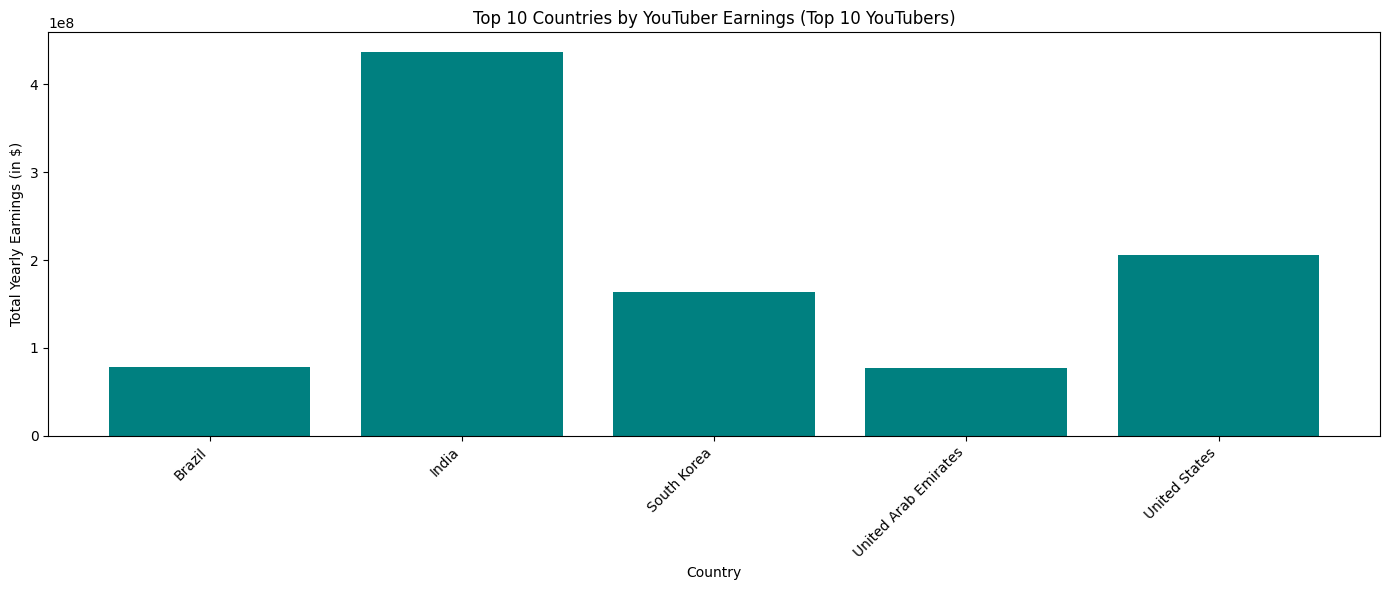

                       Youtuber               Country  highest_yearly_earnings
495            ýýýýýýýýý KIMPRO           South Korea              163400000.0
417                DaFuq!?Boom!         United States              110600000.0
0                      T-Series                 India              108400000.0
3    Cocomelon - Nursery Rhymes         United States               94800000.0
4                     SET India                 India               87500000.0
21                       Zee TV                 India               81900000.0
139                    StarPlus                 India               80000000.0
15                     Sony SAB                 India               79600000.0
83                  GR6 EXPLODE                Brazil               78500000.0
332  ZAMZAM ELECTRONICS TRADING  United Arab Emirates               76700000.0


In [ ]:
top_10_earnings = youtube.sort_values(by='highest_yearly_earnings', ascending=False).head(10)
top_earnings_by_country = top_10_earnings.groupby('Country')['highest_yearly_earnings'].sum().reset_index()
# Plot top 10 countries with the highest earnings
plt.figure(figsize=(14, 6))
plt.bar(top_earnings_by_country['Country'], top_earnings_by_country['highest_yearly_earnings'], color='teal')
plt.title('Top 10 Countries by YouTuber Earnings (Top 10 YouTubers)')
plt.xlabel('Country')
plt.ylabel('Total Yearly Earnings (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print(top_10_earnings[['Youtuber', 'Country', 'highest_yearly_earnings']])

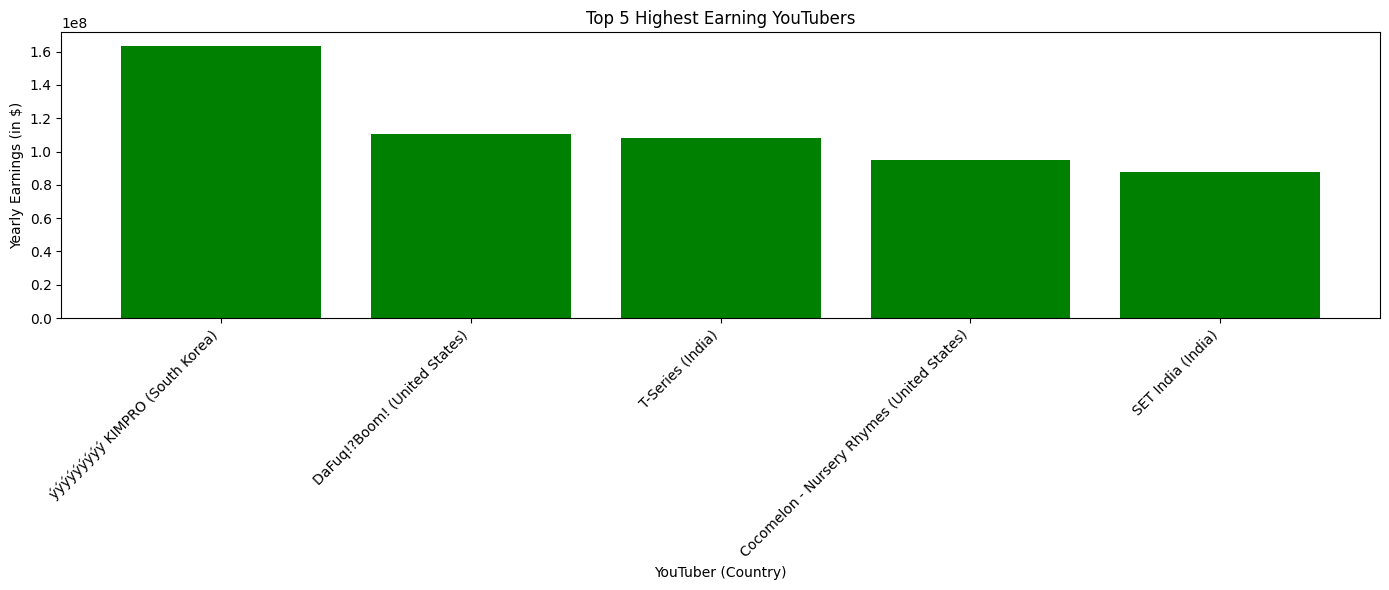

In [ ]:
top_earning = youtube.sort_values(by='highest_yearly_earnings', ascending=False).head(5)
plt.figure(figsize=(14, 6))
plt.bar(top_earning['Youtuber'] + " (" + top_earning['Country'] + ")",
        top_earning['highest_yearly_earnings'], color='green')
plt.title('Top 5 Highest Earning YouTubers')
plt.xlabel('YouTuber (Country)')
plt.ylabel('Yearly Earnings (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

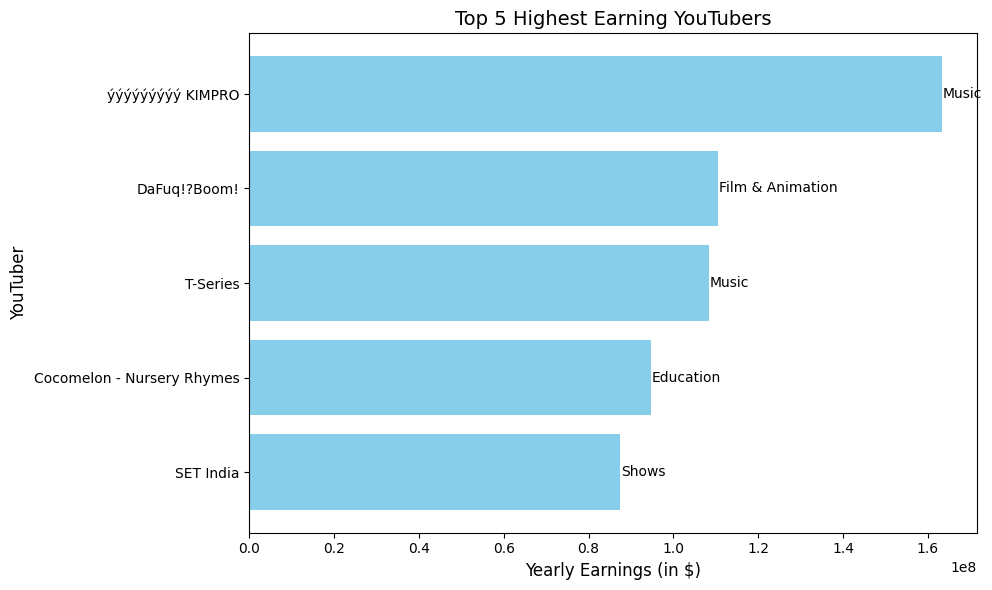

In [ ]:
# Sort to get the top 5 highest-earning YouTubers
top_earning = youtube.sort_values(by='highest_yearly_earnings', ascending=False).head(5)

# Sort the data for horizontal bar chart (descending order for bar alignment)
top_earning = top_earning.sort_values(by='highest_yearly_earnings', ascending=True)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_earning['Youtuber'],
         top_earning['highest_yearly_earnings'], color='skyblue')
plt.title('Top 5 Highest Earning YouTubers', fontsize=14)
plt.xlabel('Yearly Earnings (in $)', fontsize=12)
plt.ylabel('YouTuber', fontsize=12)

# Annotate each bar with the category
for i, (earnings, category) in enumerate(zip(top_earning['highest_yearly_earnings'], top_earning['category'])):
    plt.text(earnings + 1e5, i, category, va='center', fontsize=10)

plt.tight_layout()
plt.show()

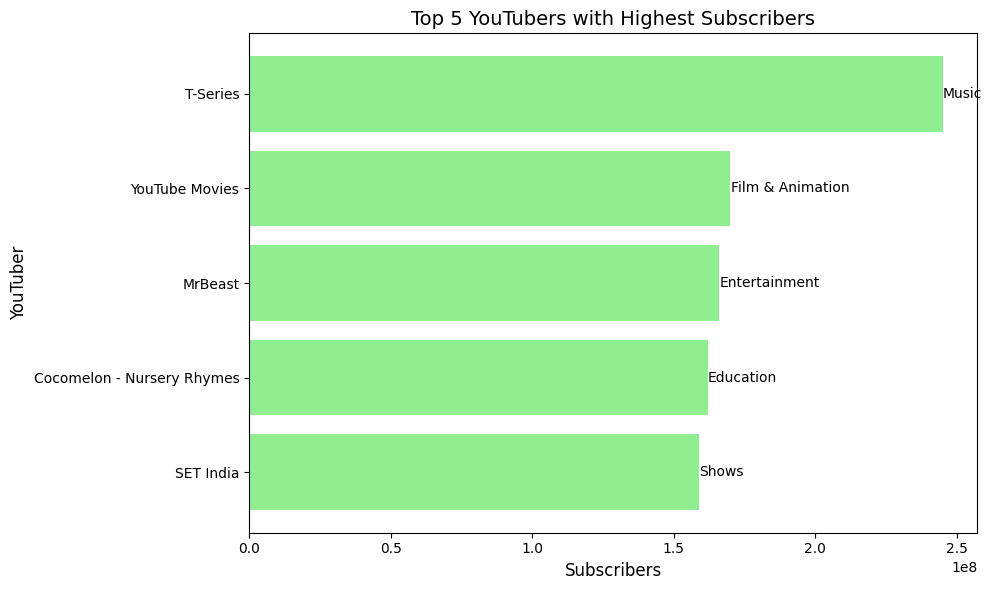

In [ ]:

# Sort to get the top 5 YouTubers with the highest subscribers
top_subscribers = youtube.sort_values(by='subscribers', ascending=False).head(5)

# Sort the data for horizontal bar chart (descending order for bar alignment)
top_subscribers = top_subscribers.sort_values(by='subscribers', ascending=True)

# Create a horizontal bar chart for highest subscribers
plt.figure(figsize=(10, 6))
plt.barh(top_subscribers['Youtuber'],
         top_subscribers['subscribers'], color='lightgreen')
plt.title('Top 5 YouTubers with Highest Subscribers', fontsize=14)
plt.xlabel('Subscribers', fontsize=12)
plt.ylabel('YouTuber', fontsize=12)

# Annotate each bar with the category
for i, (subs, category) in enumerate(zip(top_subscribers['subscribers'], top_subscribers['category'])):
    plt.text(subs + 1e5, i, category, va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
youtube.columns

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'category', 'Title',
       'uploads', 'Country', 'channel_type', 'video_views_rank',
       'country_rank', 'channel_type_rank', 'lowest_monthly_earnings',
       'highest_monthly_earnings', 'lowest_yearly_earnings',
       'highest_yearly_earnings', 'created_year', 'created_month',
       'created_date', 'Gross tertiary education enrollment (%)', 'Population',
       'Unemployment rate', 'Urban_population', 'Latitude', 'Longitude',
       'created_month_num', 'created_datetime'],
      dtype='object')

In [ ]:
# Filter out United States and India
filtered_countries = youtube[~youtube['Country'].isin(['United States', 'India'])]

In [ ]:
import plotly.express as px

# Dataset for "United States" and "India"
us_india_data = youtube[youtube['Country'].isin(['United States', 'India'])]

# Calculate Urban Percentage
us_india_data['Urban_Percentage'] = (us_india_data['Urban_population'] / us_india_data['Population']) * 100

# Bubble chart for "United States" and "India"
fig_us_india = px.scatter(
    us_india_data,
    x="Urban_population",
    y="Population",
    size="Urban_Percentage",
    color="Country",
    hover_name="Country",
    title="Bubble Chart: Urban vs. Total Population (United States and India)",
    labels={"Urban_population": "Urban Population", "Population": "Total Population"},
    size_max=50,
)

# Show the plot
fig_us_india.show()


<ipython-input-43-56669936221f>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Adjust column names as needed and re-run the corrected code
top_countries = (
    youtube.groupby('Country')['Urban_population'].sum().nlargest(2).index
)
filtered_data = youtube[youtube['Country'].isin(top_countries)]

# Ensure proper column names and drop missing values
filtered_data = filtered_data[['Urban_population', 'Population']].dropna()

# Compute the correlation matrix
correlation_matrix = filtered_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Correlation Heatmap: Urban Population vs. Population')
plt.show()

From the chart, here are some key insights that might explain why India is among the top two earning countries from YouTube despite being a developing (or third-world) country:

**Large Urban Population:** Although smaller than the USA's, India's urban population is significant, providing a large audience with access to internet and YouTube.

**Rapid Internet Penetration**: With affordable data plans and widespread smartphone usage, India's internet access has grown tremendously in urban and rural areas.

**High Engagement: **Indians spend a substantial amount of time on YouTube for entertainment, education, and news, which drives ad revenue.

**Massive Population Size:** Even with a smaller percentage of the population enrolled in tertiary education compared to the USA, India's absolute numbers are massive due to its population size, contributing to a substantial creator and viewer base.

**Cultural Diversity in Content:** India's diverse languages and cultures lead to a variety of content catering to multiple demographics, increasing engagement across regions.
Growing Creator Ecosystem: Indian creators leverage YouTube effectively to reach global audiences, earning substantial ad revenue and sponsorship deals.

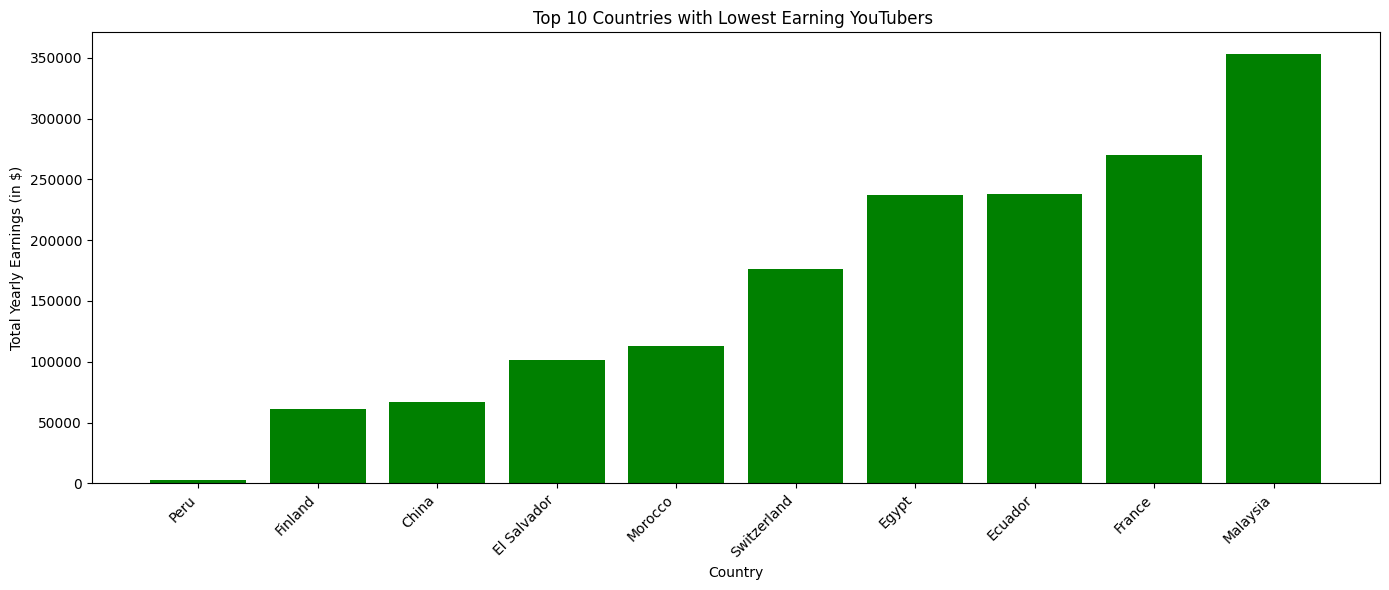

In [ ]:
# Plot top 10 lowest earning countries
# Get Peru's lowest_yearly_earnings
peru_earnings = lowest_earning_countries.loc[lowest_earning_countries['Country'] == 'Peru', 'lowest_yearly_earnings'].values[0]
# Filter countries with earnings greater than Peru
countries_greater_than_peru = lowest_earning_countries[lowest_earning_countries['lowest_yearly_earnings'] >= peru_earnings].head(10)
# Plot
plt.figure(figsize=(14, 6))
plt.bar(countries_greater_than_peru['Country'], countries_greater_than_peru['lowest_yearly_earnings'], color='green')
plt.title('Top 10 Countries with Lowest Earning YouTubers ')
plt.xlabel('Country')
plt.ylabel('Total Yearly Earnings (in $)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()